<a href="https://colab.research.google.com/github/larajakl/Machine-Learning/blob/main/02_Gender_Identification_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Word Idetification

In this exercise, you will explore the characteristics and create features to classify a single word.

We will use a dataset of latin names and classify them by their expected gender.
(If you prefer working on a different dataset, please feel free to create and work on another one. For example, a list of words in 2 languages, such as English/Romanian or transliterated Arabic/Berber, etc.)

Based on the nltk book: https://www.nltk.org/book/ch06.html

### Data Download

In [1]:
import nltk

In [2]:
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

Let's take a sneak peek:

In [3]:
nltk.corpus.names.words('male.txt')[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

### Import the names Data

In [4]:
from nltk.corpus import names

In [5]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

# Data Exploration

The first step in every task is **always** (!!!) to look at your data.

The dataset contains about 8k names:

In [6]:
print(f'there are {len(male_names)} male names and {len(female_names)} female names')

there are 2943 male names and 5001 female names


In [7]:
male_names[:50]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim',
 'Abdullah',
 'Abe',
 'Abel',
 'Abelard',
 'Abner',
 'Abraham',
 'Abram',
 'Ace',
 'Adair',
 'Adam',
 'Adams',
 'Addie',
 'Adger',
 'Aditya',
 'Adlai',
 'Adnan',
 'Adolf',
 'Adolfo',
 'Adolph',
 'Adolphe',
 'Adolpho',
 'Adolphus',
 'Adrian',
 'Adrick',
 'Adrien',
 'Agamemnon',
 'Aguinaldo',
 'Aguste',
 'Agustin',
 'Aharon',
 'Ahmad',
 'Ahmed',
 'Ahmet',
 'Ajai',
 'Ajay',
 'Al',
 'Alaa',
 'Alain',
 'Alan',
 'Alasdair']

In [8]:
female_names[:50]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale',
 'Abra',
 'Acacia',
 'Ada',
 'Adah',
 'Adaline',
 'Adara',
 'Addie',
 'Addis',
 'Adel',
 'Adela',
 'Adelaide',
 'Adele',
 'Adelice',
 'Adelina',
 'Adelind',
 'Adeline',
 'Adella',
 'Adelle',
 'Adena',
 'Adey',
 'Adi',
 'Adiana',
 'Adina',
 'Adora',
 'Adore',
 'Adoree',
 'Adorne',
 'Adrea',
 'Adria',
 'Adriaens',
 'Adrian',
 'Adriana',
 'Adriane',
 'Adrianna',
 'Adrianne',
 'Adrien',
 'Adriena',
 'Adrienne',
 'Aeriel',
 'Aeriela']

Some names can be either for boys or girls - Let's check how many of these names appear in both groups:

In [9]:
## YOUR TURN:
# Find which names are common for both male and females:

double_names = [name for name in female_names if name in male_names]

#other way to do this task:
#double_names = set(male_names).intersection(set(female_names))

print(f'There are {len(double_names)} names which are shared between the genders: \n\n {double_names}')

There are 365 names which are shared between the genders: 

 ['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', '

Our task is to identify the person's gender by a given name.

This task is a **Classification** task.

In classification, the model must choose the correct label from a fixed set of possible labels.
Examples of classification task include:

- Spam detection (spam/not spam)
- Assigning a topic to an article (Politics, Sports, Economics)
- Detecting the type of a proper name (location, people, company) - also called Named Entity Recognition (NER)

A classifier is **supervised**, if it is trained using a set of correctly labeled pairs $(X → y)$.

As you may already know, no machine learning algorithm can process text as it is. We must convert it into a numerical representation for the computer to be able to process it. We achieve that using a feature extractor function:

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/feature_extractor.png)

# 1. Classification with NLTK

Let's start with creating a classifier using the `nltk` package, which we got to know in the first exercise.

For this, we first create a small 'dataset' that combines both the female and the male names:

In [10]:
labeled_names = ([(name, 'male') for name in male_names] + [(name, 'female') for name in female_names])

Then, we shuffle the names. This is always a good idea to shuffle the samples order - not to teach our models to be expecting any specific order...

In [11]:
import random

random.shuffle(labeled_names)

Computers and machine learning models can't read. They don't understand the notion of words or characters. Every character is represented by some number.

For example, the [ASCII code](https://www.ascii-code.com/) represents the letter 'A' as the number 65, and the letter 'a' as 97.  
[Unicode](https://home.unicode.org/), expands ASCII further, and adds newer characters, such as "€" which is represented by the code `8364`, or the smily-face emoji 😊 which is represented by the code `128522`.  

In Python, you can achieve the unicode of character using the [`ord`](https://docs.python.org/3/library/functions.html#ord) method.  

And yet, these numbers don't mean much. It doesn't hold a special numerical meaning when it represents a vowel or constant, a frequent letter such as 'e', versus a relatively 'new' letter in the alphabeth, such as "V" vs "U", or "Z"...

As linguists, we can use our language knowledge to craft new numerical features that represents better the data.

**Think**: Which features can you craft to represent the gender in a first name?  
Also, you might want to visualize and explore the data with statistical tools to find feature ideas.

In [12]:
print(ord('A')) # Output: 65
print(ord('a')) # Output: 97
print(ord('€')) # Output: 8364
print(ord('😊')) # Output: 128522

65
97
8364
128522


In [13]:
### YOUR TURN:
### Write a feature function that generate features to help a model deciding if
### a name is male or female.
### Given a name (first_name), return a dictionary of such features
### To get the unicode of a character, you can use the ord method

def gender_features(first_name: str) -> dict[str, float]:
  # Which features can we use to detect the gender?
  # Craft at least one feature and return it as a feature dictionary

  first_name = first_name.lower()

  return {
      'last_letter_in_unicode': ord(first_name[-1]), 'length': len(first_name), 'count_vowels': sum(1 for char in first_name if char in 'aeiou')
      }

# Here I test the gender features on 2 names to see how the output will look:

print(gender_features("Abby"))
print(gender_features("Abdul"))




{'last_letter_in_unicode': 121, 'length': 4, 'count_vowels': 1}
{'last_letter_in_unicode': 108, 'length': 5, 'count_vowels': 2}


Now that we have a feature function, we can use it to convert our dataset into numerical features, and train our first Machine Learning model:

In [14]:
feature_sets = [(gender_features(first_name), gender) for (first_name, gender) in labeled_names]

# We split the dataset to create a previously unseen 'exam' for the model:
train_set, test_set = feature_sets[500:], feature_sets[:500]

# And then, define and train the NLTK classifier
name_classifier = nltk.DecisionTreeClassifier.train(train_set)

In [15]:
for name in ["Bill", "Melissa", "Barack", "Michelle", "Joe", "Jill", "Donald", "Ivanka"]:
  predicted_gender = name_classifier.classify(gender_features(name))
  print(f"the gender prediction for {name} is {predicted_gender}")

the gender prediction for Bill is female
the gender prediction for Melissa is female
the gender prediction for Barack is male
the gender prediction for Michelle is female
the gender prediction for Joe is female
the gender prediction for Jill is female
the gender prediction for Donald is male
the gender prediction for Ivanka is female


In [16]:
print(nltk.classify.accuracy(name_classifier, test_set))

0.768


In [17]:
print(name_classifier.pretty_format())

last_letter_in_unicode=100? ........................... male
last_letter_in_unicode=101? ........................... male
  length=10? .......................................... female
  length=11? .......................................... female
  length=12? .......................................... female
  length=13? .......................................... female
  length=15? .......................................... male
  length=3? ........................................... female
    count_vowels=2? ................................... female
    count_vowels=1? ................................... male
  length=4? ........................................... male
    count_vowels=2? ................................... female
    count_vowels=3? ................................... female
    count_vowels=1? ................................... male
  length=5? ........................................... female
  length=6? ........................................... female
  le

# 2. Classification with Scikit-Learn

[Science-Kit Learn](https://scikit-learn.org/stable/index.html) (or SKLearn) is an excellent package for machine learning and is widely used.  
It offers many different models, for both supervised and unsupervised learning, as well as tools such as pipelines that enables us to combine models together (ensemble).

Let's use its Decision Tree model, together with metric tools to evaluate how well our model does:

In [18]:
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [19]:
# Maps to convert labels into numerical ids:

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

We start by creating our dataset (X) and our prediction targets (y).

Our goal is to create a discriminative model: $f(X) → y$

In [20]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

And divide our data into a training-set, and an unseen testing-set:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234, stratify=y)

This method, [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is very important and you will be using it quite often. Let's get to know it better!

The method receives 5 arguments here:
- `X` & `y`, are the data and the corresponding labels
- `shuffle` - When set to `True`, it randomly sorts the samples. We constructed the dataset from a list of males names, followed by the females. We must scramble them both a bit to have a good mix.
- `random_state` - As much as we want it mixed, we also want the ability to reproduce exactly the same randomly sorted values. `random_state` value "fixes" the random function to always output the same "randomly" sorted results. It can be any numerical value. As long as you always pass the _same_ numerical value, the randomly sorted list output will also stay the same.
- `stratify` - Our dataset is uneven: we have a 3:5 male to female names ratio. We want to keep that ratio also while splitting the dataset, so our exam, the test-set, will have a similar ratio as the training. Stratify takes care that despite the randomly split, the ratio will be kept.  

In [22]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

It is the time to initialize our [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=10, random_state=1234)

And of course, we need our Feature Function again.  
However, unlike NLTK, which required a **dictionary** of features, when working with SKLearn, we need to use a **list** of numerical features (a vector).

Here, we just return the last letter of the name as a feature. The python function [`ord`](https://docs.python.org/3/library/functions.html#ord) returns the unicode numerical code of the character.

In [24]:
def gender_feature_function(first_name: str) -> list[float]:
  """
  Given a first name, return the features to represent it.

  Args:
    first_name (string): a string representing a first name.

  Returns:
    A list of numerical features

  """
  last_letter_in_unicode = ord(first_name[-1])
  length = len(first_name)
  count_vowels = sum(1 for char in first_name if char in 'aeiou')
  proportion_vowels = count_vowels / length
  consonants = sum(1 for char in first_name.lower() if char.isalpha() and char not in 'aeiou')
  last_2_letters = (ord(first_name[-2]) if len(first_name) > 1 else 0, ord(first_name[-1]))
  common_suffixes_female = ["ina", "ine", "tte", "lle", "ia", "ra", "na", "ette", "ie"]
  has_female_suffix = any(first_name.lower().endswith(suffix) for suffix in common_suffixes_female)
  common_suffixes_male = ["ton", "ard", "son", "ley", "er", "an"]
  has_male_suffix = any(first_name.lower().endswith(suffix) for suffix in common_suffixes_male)

  list_numerical_features = [last_letter_in_unicode, length, count_vowels, proportion_vowels, consonants, last_2_letters[0], last_2_letters[1], has_female_suffix, has_male_suffix]

  return list_numerical_features

In [25]:
#assert gender_feature_function("Željko") == [111]

Now we can use our feature function and convert our data into numerical features:

In [26]:
X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))

In [27]:
X_train[:10]

[[101, 5, 2, 0.4, 2, 105, 101, True, False],
 [104, 6, 2, 0.3333333333333333, 4, 97, 104, False, False],
 [121, 5, 1, 0.2, 4, 116, 121, False, False],
 [102, 6, 2, 0.3333333333333333, 4, 108, 102, False, False],
 [101, 6, 4, 0.6666666666666666, 2, 101, 101, False, False],
 [114, 6, 2, 0.3333333333333333, 4, 97, 114, False, False],
 [110, 6, 2, 0.3333333333333333, 4, 105, 110, False, False],
 [101, 6, 3, 0.5, 3, 108, 101, False, False],
 [97, 9, 4, 0.4444444444444444, 5, 116, 97, False, False],
 [101, 5, 2, 0.4, 2, 110, 101, False, False]]

Before using our training data vector for training the model, we often need to convert it from a python list, into a [NumPy](https://numpy.org/) array. NumPy is an excellent python pacakge for handling mathematical operations with Python.

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [29]:
X_train.shape

(5958, 9)

In [30]:
X_train[:10]

array([[101.        ,   5.        ,   2.        ,   0.4       ,
          2.        , 105.        , 101.        ,   1.        ,
          0.        ],
       [104.        ,   6.        ,   2.        ,   0.33333333,
          4.        ,  97.        , 104.        ,   0.        ,
          0.        ],
       [121.        ,   5.        ,   1.        ,   0.2       ,
          4.        , 116.        , 121.        ,   0.        ,
          0.        ],
       [102.        ,   6.        ,   2.        ,   0.33333333,
          4.        , 108.        , 102.        ,   0.        ,
          0.        ],
       [101.        ,   6.        ,   4.        ,   0.66666667,
          2.        , 101.        , 101.        ,   0.        ,
          0.        ],
       [114.        ,   6.        ,   2.        ,   0.33333333,
          4.        ,  97.        , 114.        ,   0.        ,
          0.        ],
       [110.        ,   6.        ,   2.        ,   0.33333333,
          4.        , 105.    

Let's take a peek and ensure our data is in the way we want it to be:

In [31]:
# zip is a python method to combine (merge) two lists into one
# with it, we can see our features, and the labels, together as a lsit of tuples
print(list(zip(X_train[:5], y_train[:5])))

[(array([101. ,   5. ,   2. ,   0.4,   2. , 105. , 101. ,   1. ,   0. ]), 0), (array([104.        ,   6.        ,   2.        ,   0.33333333,
         4.        ,  97.        , 104.        ,   0.        ,
         0.        ]), 1), (array([121. ,   5. ,   1. ,   0.2,   4. , 116. , 121. ,   0. ,   0. ]), 1), (array([102.        ,   6.        ,   2.        ,   0.33333333,
         4.        , 108.        , 102.        ,   0.        ,
         0.        ]), 0), (array([101.        ,   6.        ,   4.        ,   0.66666667,
         2.        , 101.        , 101.        ,   0.        ,
         0.        ]), 1)]


And finally, we are ready to train our model:

In [32]:
clf = clf.fit(X_train, y_train)

### Visualizing our tree

We have trained a model, and now we want to understand how this model operates: Which features got more importance, which less, and in which way?

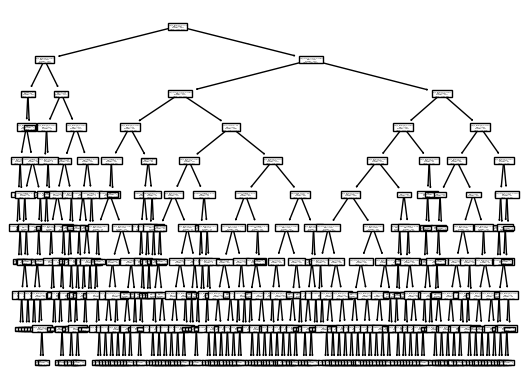

In [33]:
tree.plot_tree(clf, feature_names = ["last_letter_in_unicode", "length", "count_vowels", "proportion_vowels", "consonants", "last_2_letters[0]", "last_2_letters[1]", "has_female_suffix", "has_male_suffix"])
plt.show()

Now that we have a model, we can evaluate how well we did.

SKLearn has many different metrics to test our model. For classification tasks, the most common are:
- Precision
- Recall
- F-Score
- Area under curve (AUC)
- Mathew's Correlation Coefficience (MCC)

But many more exists, and it depends on the task in hand, to decide which one would represent our data bet.


Note: Be careful and don't blindly trust the metrics. Always be judgemental and stay critical about your results and achievements. Here's an [excellent video about the topic - and why we should suspect our resutls](https://www.youtube.com/watch?v=r_V1pveRKoo).

In [34]:
predictions = clf.predict(X_test)

In [35]:
# Here I also import MCC:

from sklearn.metrics import classification_report, matthews_corrcoef

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       736
           1       0.83      0.83      0.83      1250

    accuracy                           0.78      1986
   macro avg       0.77      0.77      0.77      1986
weighted avg       0.78      0.78      0.78      1986



In [37]:
# And here I calculate the MCC score:

mcc_score = matthews_corrcoef(y_test, predictions)
print(f"MCC Score: {mcc_score}")


MCC Score: 0.5348609345970939


---

We can use [`graphviz`](https://graphviz.org/) to visualize the tree we trained, to understand which features are more important, and therefore have more weight.

Graphviz creates an image of the tree, which looks something like this:

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/DecisionTree.png)

In [38]:
import graphviz


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=["last_letter_in_unicode", "length", "count_vowels", "proportion_vowels", "consonants", "last_2_letters[0]", "last_2_letters[1]", "has_female_suffix", "has_male_suffix"],
                                class_names=["male", "female"],
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)

In [39]:
graph.view()

'Source.gv.pdf'

#### SuperTree
SuperTree is a newer interactive visualization package that helps us exploring decisio trees
It's an open source package, and you can find more about it here: https://github.com/mljar/supertree

In [40]:
%pip install supertree --quiet

In [41]:
from supertree import SuperTree

In [42]:
super_tree = SuperTree(clf,
                       X_test,
                       y_test,
                       feature_names=["last_letter_in_unicode", "length", "count_vowels", "proportion_vowels", "consonants", "last_2_letters[0]", "last_2_letters[1]", "has_female_suffix", "has_male_suffix"],
                       target_names=["male", "female"])

# show tree in your notebook
super_tree.show_tree()


## Excercise: Improve the results

With a naive last-letter feature, we got about an F-Score of ~71-73.
This is not great: 1 out of 4 names is wrongly classified.

How can we improve it further? Which features can we craft?
1. Perform statistical analysis of the dataset: which letters unigrams/bigrams/trigrams are the most common for each gender, and in which position do they appear?
2. Create additional features and re-train the model. Can you score above 80%? above 90%? above 95%?

In [43]:
# Here I perform statistical analyses of the dataset. In hindsight, I realised that I basically perform
# these analyses on the whole dataset although we said in class that we should not touch the test set... I hereby try to justify this by saying that these
# analyses give me general knowledge of possible differentiating characteristics of male names and female names, and by stating that it would be more
# complex to do these analyses on the training set only, due to the fact that the training set consists of numbers now, not strings anymore (so I would have to
# convert back to strings I assume).

# In the following lines of code, I check for unigrams, bigrams, ngrams (mostly as suffixes) that I thought might be insightful to
# differentiate male from female names. I assume here that there are some suffixes that are typical for male names and suffixes that are typical for female
# names. I also want to state that I previously did some research online into specific characteristics of latin male/female names and consequently checked
# if these apply to the names in the dataset, and if so, I then included them as features.
# I also played around with the depth of the decision tree (but that is the only hyperparameter I changed) and tried to get the
# best possible results by continuously checking the F1 and MCC score.

# Statistics:


# Concise way to calculate how many names per gender in the dataset (in percent) end with a specific suffix:
def calculate_suffix_proportion(names, suffix):
    count = sum(name.lower().endswith(suffix.lower()) for name in names)
    return count / len(names) if names else 0  # to avoid division by zero (but in our case there should be no 0-problem)

# these are the suffixes I checked:
suffixes = ['ina', 'na', 'ia', 'ra', 'ette', 'son', 'lyn', 'ie', 'ton', 'er', 'ald', 'us', 'an', 'ar']

for suffix in suffixes:
    male_proportion = calculate_suffix_proportion(male_names, suffix)
    female_proportion = calculate_suffix_proportion(female_names, suffix)
    print(f"Suffix '{suffix}':")
    print(f"  Male proportion: {male_proportion:.2%}")
    print(f"  Female proportion: {female_proportion:.2%}")
    print()

# before coming up with the idea to make a function out of this, I had a lot of duplicate long code:
'''
male_ending_ina = [name for name in male_names if len(name) >= 4 and name[-3] == 'i' and name[-2] =='n' and name[-1] == 'a']
female_ending_ina = [name for name in female_names if len(name) >= 4 and name[-3] == 'i' and name[-2] =='n' and name[-1] == 'a']
print(f"Male names ending in ina:", len(male_ending_ina)/len(male_names)) # 0 percent
print(f"Female names ending in ina:", len(female_ending_ina)/len(female_names)) # 0 percent
print()
male_ending_na = [name for name in male_names if name[-2] =='n' and name[-1] == 'a']
female_ending_na = [name for name in female_names if name[-2] =='n' and name[-1] == 'a']
print(f"Male names ending in na:", len(male_ending_na)/len(male_names)) # 0.07 percent
print(f"Female names ending in na:", len(female_ending_na)/len(female_names)) # 8.9 percent
print()
male_ending_ia = [name for name in male_names if name[-2] =='i' and name[-1] == 'a']
female_ending_ia = [name for name in female_names if name[-2] =='i' and name[-1] == 'a']
print(f"Male names ending in ia:", len(male_ending_ia)/len(male_names)) # 0.1 percent
print(f"Female names ending in ia:", len(female_ending_ia)/len(female_names)) # 5 percent
print()
male_ending_ra = [name for name in male_names if name[-2] =='r' and name[-1] == 'a']
female_ending_ra = [name for name in female_names if name[-2] =='r' and name[-1] == 'a']
print(f"Male names ending in ra:", len(male_ending_ra)/len(male_names)) # 0.1 percent
print(f"Female names ending in ra:", len(female_ending_ra)/len(female_names)) # 3 percent
print()
male_ending_ette = [name for name in male_names if len(name) >= 4 and name[-4] == 'e' and name[-3] == 't' and name[-2] =='t' and name[-1] == 'e']
female_ending_ette = [name for name in female_names if len(name) >= 4 and name[-4] == 'e' and name[-3] == 't' and name[-2] =='t' and name[-1] == 'e']
print(f"Male names ending in ette:", len(male_ending_ette)/len(male_names)) # 0 percent
print(f"Female names ending in ette:", len(female_ending_ette)/len(female_names)) # 1.8 percent
print()
male_ending_son = [name for name in male_names if [-3] == 's' and name[-2] =='o' and name[-1] == 'n']
female_ending_son = [name for name in female_names if [-3] == 's' and name[-2] =='o' and name[-1] == 'n']
print(f"Male names ending in son:", len(male_ending_son)/len(male_names)) # 0 percent
print(f"Female names ending in son:", len(female_ending_son)/len(female_names)) # 0 percent
print()
male_ending_lyn = [name for name in male_names if [-3] == 'l' and name[-2] =='y' and name[-1] == 'n']
female_ending_lyn = [name for name in female_names if [-3] == 'l' and name[-2] =='y' and name[-1] == 'n']
print(f"Male names ending in lyn:", len(male_ending_lyn)/len(male_names)) # 0 percent
print(f"Female names ending in lyn:", len(female_ending_lyn)/len(female_names)) # 0 percent
print()
male_ending_ie = [name for name in male_names if name[-2] =='i' and name[-1] == 'e']
female_ending_ie = [name for name in female_names if name[-2] =='i' and name[-1] == 'e']
print(f"Male names ending in ie:", len(male_ending_ie)/len(male_names)) # 5 percent
print(f"Female names ending in ie:", len(female_ending_ie)/len(female_names)) # 8 percent
print()
male_ending_ton = [name for name in male_names if [-3] == 't' and name[-2] =='o' and name[-1] == 'n']
female_ending_ton = [name for name in female_names if [-3] == 't' and name[-2] =='o' and name[-1] == 'n']
print(f"Male names ending in ton:", len(male_ending_ton)/len(male_names)) # 0 percent
print(f"Female names ending in ton:", len(female_ending_ton)/len(female_names)) # 0 percent
print()
male_ending_er = [name for name in male_names if name[-2] =='e' and name[-1] == 'r']
female_ending_er = [name for name in female_names if name[-2] =='e' and name[-1] == 'r']
print(f"Male names ending in er:", len(male_ending_er)/len(male_names)) # 4 percent
print(f"Female names ending in er:", len(female_ending_er)/len(female_names)) # 0.5 percent
print()
male_ending_ald = [name for name in male_names if [-3] == 'a' and name[-2] =='l' and name[-1] == 'd']
female_ending_ald = [name for name in female_names if [-3] == 'a' and name[-2] =='l' and name[-1] == 'd']
print(f"Male names ending in ald:", len(male_ending_ald)/len(male_names)) # 0 percent
print(f"Female names ending in ald:", len(female_ending_ald)/len(female_names)) # 0 percent
print()
male_ending_us = [name for name in male_names if name[-2] =='u' and name[-1] == 's']
female_ending_us = [name for name in female_names if name[-2] =='u' and name[-1] == 's']
print(f"Male names ending in us:", len(male_ending_us)/len(male_names)) # 2 percent
print(f"Female names ending in us:", len(female_ending_us)/len(female_names)) # 0.06 percent
print()
male_ending_an = [name for name in male_names if name[-2] =='a' and name[-1] == 'n']
female_ending_an = [name for name in female_names if name[-2] =='a' and name[-1] == 'n']
print(f"Male names ending in an:", len(male_ending_an)/len(male_names)) # 3.5 percent
print(f"Female names ending in an:", len(female_ending_an)/len(female_names)) # 1.1 percent
print()
male_ending_ar = [name for name in male_names if name[-2] =='a' and name[-1] == 'r']
female_ending_ar = [name for name in female_names if name[-2] =='a' and name[-1] == 'r']
print(f"Male names ending in ar:", len(male_ending_ar)/len(male_names)) # 0.8 percent
print(f"Female names ending in ar:", len(female_ending_ar)/len(female_names)) # 0.1 percent
print()
male_containing_a_and_e = [name for name in male_names if 'a' in name or 'e' in name]
female_containing_a_and_e = [name for name in female_names if 'a' in name or 'e' in name]
print(f"Male names containing a, e or both:", len(male_containing_a_and_e)/len(male_names)) # 78 percent
print(f"Female names containing a, e or both:", len(female_containing_a_and_e)/len(female_names)) # 90 percent
print()
male_containing_ina = [name for name in male_names if 'ina' in name]
female_containing_ina = [name for name in female_names if 'ina' in name]
print(f"Male names containing ina:", len(male_containing_ina)/len(male_names)) # this is 0.2 percent
print(f"Female names containing ina:", len(female_containing_ina)/len(female_names)) # this is 3.5 percent
'''

# Conclusion of this check: the suffixes "er" and "an" (more male than female) and the suffixes "ia", "ra", "na", "ette", "ie" (more female than
# male) show the biggest difference between male and female names.
# I therefore tried to include them as features in the function above.

# In the following lines of code, I calculate the most frequent bigrams for male and female names:
from collections import Counter, defaultdict
from nltk.util import ngrams

male_bigrams = [bigram for name in male_names for bigram in ngrams(name.lower(), 2)]
female_bigrams = [bigram for name in female_names for bigram in ngrams(name.lower(), 2)]

male_bigram_counts = Counter(male_bigrams)
female_bigram_counts = Counter(female_bigrams)

print(f"Most common bigrams in male names:", male_bigram_counts.most_common(5))
print(f"Most common bigrams in female names:", female_bigram_counts.most_common(5))

# when I included the bigrams in my feature function, the evaluation scores went down a little bit,
# so I removed them again... I had tried these:
# bigrams_female = any(bigram in first_name for bigram in ['el', 'ne'])
# bigrams_male = any(bigram in first_name for bigram in ['er', 'on'])

# Here I had tested the bigrams:
# print(gender_feature_function("Elena"))  # Should have bigrams_female = True -> yes, it worked (Ouput: [97, 5, 2, 0.4, 2, 110, 97, True, False, True, False]) -> second last is bigrams_female
# print(gender_feature_function("Connor")) # Should have bigrams_male = True -> yes, it worked (Output: [114, 6, 2, 0.3333333333333333, 4, 111, 114, False, False, False, True]) -> last is bigrams_male

# The feature function of the first letter of the name is also a feature that I tried but it also decreased my scores so I decided not to use it.

# Lastly, I decided to also do a more thorough statistical analyses of ngrams. I checked which unigrams, bigrams and trigrams
# are the most common for each gender and in which position they occur:

# The following function gives me a dictionary of ngrams and their frequency based on their position (start, end, middel). "n" can be changed to 1, 2 or 3 to
# work for unigrams, bigrams, trigrams:
def analyze_ngrams(names, n=1):
    ngram_counts = defaultdict(Counter)  # = count-dictionary that I will return
    for name in names:
        name = name.lower()
        length = len(name)
        # The following loop adds all n-grams and puts them at the right position in the dictionary
        for i in range(length - n + 1):
            ngram = name[i:i+n]
            if i == 0:  # for starting position
                ngram_counts['start'][ngram] += 1
            elif i == length - n:  # for ending position
                ngram_counts['end'][ngram] += 1
            else:  # for middle position
                ngram_counts['middle'][ngram] += 1
    return ngram_counts

# the following function gives me the top 10 most common uni-, bi- and trigrams per position:
def display_top_ngrams(ngram_counts, top_n=10):
    for position, counter in ngram_counts.items(): # here i need items() to be able to iterate through the get key-value pairs. this loop goes through the 3 positions
        print(f"Top {top_n} n-grams at {position}:")
        for ngram, count in counter.most_common(top_n): # this loop goes through the most common ngrams of this position
            print(f"{ngram}: {count}")
        print()

# now I apply these functions to the male and female names:
print("Male names:")
male_unigrams = analyze_ngrams(male_names, n=1)
male_bigrams = analyze_ngrams(male_names, n=2)
male_trigrams = analyze_ngrams(male_names, n=3)
display_top_ngrams(male_unigrams)
display_top_ngrams(male_bigrams)
display_top_ngrams(male_trigrams)
print()
print("Female names:")
female_unigrams = analyze_ngrams(female_names, n=1)
female_bigrams = analyze_ngrams(female_names, n=2)
female_trigrams = analyze_ngrams(female_names, n=3)
display_top_ngrams(female_unigrams)
display_top_ngrams(female_bigrams)
display_top_ngrams(female_trigrams)

# These results showed me that some of my assumptions were right (for example that female names end in "a" more often than male names).
# The results can help incorporate even more prefixes, suffixes or simply ngrams contained somewhere in male/female names into features. I
# included some of them as features in the function above (such as the suffixes "ina", "ton", "ard", ...).

# The scores above (F1, MCC, etc.) are the highest I could reach (in the time I had available to devote to this exercise), and I assume that the model
# gets confused with the double names (those names that are both male and female) so I would be curious how well one can actually train this model
# in these circumstances without getting to overfitting.

Suffix 'ina':
  Male proportion: 0.00%
  Female proportion: 3.50%

Suffix 'na':
  Male proportion: 0.07%
  Female proportion: 8.86%

Suffix 'ia':
  Male proportion: 0.10%
  Female proportion: 4.94%

Suffix 'ra':
  Male proportion: 0.10%
  Female proportion: 3.26%

Suffix 'ette':
  Male proportion: 0.00%
  Female proportion: 1.82%

Suffix 'son':
  Male proportion: 1.26%
  Female proportion: 0.08%

Suffix 'lyn':
  Male proportion: 0.17%
  Female proportion: 1.08%

Suffix 'ie':
  Male proportion: 5.10%
  Female proportion: 8.16%

Suffix 'ton':
  Male proportion: 1.97%
  Female proportion: 0.00%

Suffix 'er':
  Male proportion: 4.08%
  Female proportion: 0.52%

Suffix 'ald':
  Male proportion: 0.41%
  Female proportion: 0.00%

Suffix 'us':
  Male proportion: 2.17%
  Female proportion: 0.06%

Suffix 'an':
  Male proportion: 3.50%
  Female proportion: 1.14%

Suffix 'ar':
  Male proportion: 0.85%
  Female proportion: 0.10%

Most common bigrams in male names: [(('e', 'r'), 385), (('a', 'r'), 3